In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [380]:
#df1 = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\APTK_240801_241129.csv',sep = ';')
#df2 = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\APTK_241202_250227.csv', sep = ';')
#df = pd.concat([df1,df2], ignore_index = True)

In [381]:
df = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\ALRS_241122_250221.csv', sep = ';',parse_dates = ['<DATE>'], dayfirst=True)
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,ALRS,60,2024-11-22,10:00,49.74,50.04,49.31,49.56,2245420
1,ALRS,60,2024-11-22,11:00,49.56,49.59,49.02,49.20,1429410
2,ALRS,60,2024-11-22,12:00,49.20,49.76,49.18,49.75,1500470
3,ALRS,60,2024-11-22,13:00,49.75,49.93,49.50,49.64,1396570
4,ALRS,60,2024-11-22,14:00,49.64,49.75,49.05,49.26,1384130
...,...,...,...,...,...,...,...,...,...
934,ALRS,60,2025-02-21,19:00,62.50,62.75,62.45,62.59,724470
935,ALRS,60,2025-02-21,20:00,62.58,62.59,62.47,62.51,142130
936,ALRS,60,2025-02-21,21:00,62.53,62.66,62.50,62.55,283190
937,ALRS,60,2025-02-21,22:00,62.56,62.56,62.46,62.53,145100


In [382]:
df = df.drop(columns = ['<TICKER>','<PER>'])
df = df.rename(columns = {'<DATE>':'date_info','<HIGH>':'high','<LOW>':'low','<TIME>':'time','<OPEN>':'open','<CLOSE>':'close','<VOL>':'vol',})
df = df.set_index('date_info')
df.head()

,time,open,high,low,close,vol
date_info,,,,,,
2024-11-22,10:00,49.74,50.04,49.31,49.56,2245420
2024-11-22,11:00,49.56,49.59,49.02,49.20,1429410
2024-11-22,12:00,49.20,49.76,49.18,49.75,1500470
2024-11-22,13:00,49.75,49.93,49.50,49.64,1396570
2024-11-22,14:00,49.64,49.75,49.05,49.26,1384130


In [383]:
df.dtypes

time      object
open     float64
high     float64
low      float64
close    float64
vol        int64
dtype: object

In [384]:
percentiles = df.groupby('date_info')['vol'].quantile(0.90)
percentiles.to_frame()

,vol
date_info,
2024-11-22,1517466.0
2024-11-25,3761926.0
2024-11-26,6201431.0
2024-11-27,6742474.0
2024-11-28,3296917.0
...,...
2025-02-17,3118656.0
2025-02-18,6359958.0
2025-02-19,1798516.0


In [385]:
df = df.merge(percentiles, on = 'date_info', how = 'left')
df = df.rename(columns = {'vol_x':'volume','vol_y':'percentile_90'})
df.head()

,time,open,high,low,close,volume,percentile_90
date_info,,,,,,,
2024-11-22,10:00,49.74,50.04,49.31,49.56,2245420,1517466.0
2024-11-22,11:00,49.56,49.59,49.02,49.20,1429410,1517466.0
2024-11-22,12:00,49.20,49.76,49.18,49.75,1500470,1517466.0
2024-11-22,13:00,49.75,49.93,49.50,49.64,1396570,1517466.0
2024-11-22,14:00,49.64,49.75,49.05,49.26,1384130,1517466.0


In [386]:
df['is_included'] = np.where(df['volume']<df['percentile_90'],0,1)
df['rate_of_growth'] = df['close']/df['open']
df.head()

,time,open,high,low,close,volume,percentile_90,is_included,rate_of_growth
date_info,,,,,,,,,
2024-11-22,10:00,49.74,50.04,49.31,49.56,2245420,1517466.0,1,0.996381
2024-11-22,11:00,49.56,49.59,49.02,49.20,1429410,1517466.0,0,0.992736
2024-11-22,12:00,49.20,49.76,49.18,49.75,1500470,1517466.0,0,1.011179
2024-11-22,13:00,49.75,49.93,49.50,49.64,1396570,1517466.0,0,0.997789
2024-11-22,14:00,49.64,49.75,49.05,49.26,1384130,1517466.0,0,0.992345


In [388]:
#df.iloc[0,1] = df.iloc[0,2] 
df

,time,open,high,low,close,volume,percentile_90,is_included,rate_of_growth
date_info,,,,,,,,,
2024-11-22,10:00,49.74,50.04,49.31,49.56,2245420,1517466.0,1,0.996381
2024-11-22,11:00,49.56,49.59,49.02,49.20,1429410,1517466.0,0,0.992736
2024-11-22,12:00,49.20,49.76,49.18,49.75,1500470,1517466.0,0,1.011179
2024-11-22,13:00,49.75,49.93,49.50,49.64,1396570,1517466.0,0,0.997789
2024-11-22,14:00,49.64,49.75,49.05,49.26,1384130,1517466.0,0,0.992345
...,...,...,...,...,...,...,...,...,...
2025-02-21,19:00,62.50,62.75,62.45,62.59,724470,2900618.0,0,1.001440
2025-02-21,20:00,62.58,62.59,62.47,62.51,142130,2900618.0,0,0.998881
2025-02-21,21:00,62.53,62.66,62.50,62.55,283190,2900618.0,0,1.000320


In [389]:
df['result'] = df['open'] * df['rate_of_growth']
df.head()

,time,open,high,low,close,volume,percentile_90,is_included,rate_of_growth,result
date_info,,,,,,,,,,
2024-11-22,10:00,49.74,50.04,49.31,49.56,2245420,1517466.0,1,0.996381,49.56
2024-11-22,11:00,49.56,49.59,49.02,49.20,1429410,1517466.0,0,0.992736,49.20
2024-11-22,12:00,49.20,49.76,49.18,49.75,1500470,1517466.0,0,1.011179,49.75
2024-11-22,13:00,49.75,49.93,49.50,49.64,1396570,1517466.0,0,0.997789,49.64
2024-11-22,14:00,49.64,49.75,49.05,49.26,1384130,1517466.0,0,0.992345,49.26


In [390]:
for i in range(len(df['open'])):
    if i==0:
        df.iloc[i,9] = df.iloc[i,4]
    else:
        if df.iloc[i,7] == 0:
            df.iloc[i,9] = df.iloc[i-1,9]
        else:
            df.iloc[i,9] = df.iloc[i-1,9] * df.iloc[i,8]

In [391]:
#df['date_info'] = pd.to_datetime(df['date_info'])
df_res = df.iloc[:,[1,2,3,4,9]].groupby('date_info').agg({'open': 'first', 'high':'max', 'low':'min', 'close':'last','result':'mean'}).sort_index()
df_res['diff'] = df_res['close'] - df_res['result'] 
df_res

,open,high,low,close,result,diff
date_info,,,,,,
2024-11-22,49.74,50.04,48.84,49.55,49.424178,0.125822
2024-11-25,49.28,49.63,46.79,47.21,48.088457,-0.878457
2024-11-26,47.22,48.53,45.60,46.03,46.772612,-0.742612
2024-11-27,46.29,49.12,45.00,49.07,48.877416,0.192584
2024-11-28,49.10,50.53,48.06,50.24,49.737913,0.502087
...,...,...,...,...,...,...
2025-02-17,62.20,64.22,61.92,64.12,48.492246,15.627754
2025-02-18,64.20,64.40,61.15,61.70,48.735980,12.964020
2025-02-19,61.60,63.30,61.10,62.72,48.540703,14.179297


In [394]:
up = df_res[df_res.close > df_res.open]
down = df_res[df_res.close < df_res.open]
col_1 = 'green'
col_2 = 'red'
width_1 = .8
width_2 = .03

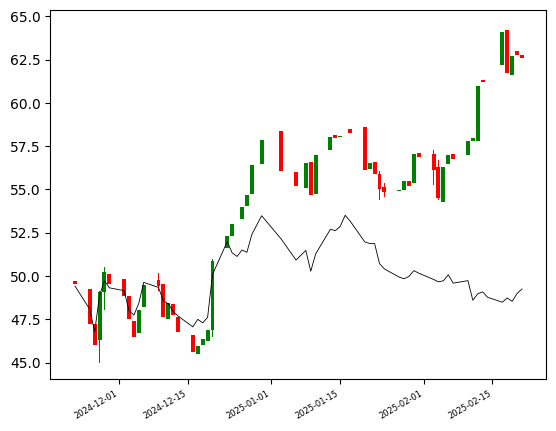

In [397]:
# bottom указывает на базовую линию, от которой будут строиться столбцы

plt.bar(up.index, up.close-up.open, width_1, bottom=up.open, color=col_1) 
plt.bar(up.index, up.high-up.close, width_2, bottom=up.close, color=col_1) 
plt.bar(up.index, up.low-up.open, width_2, bottom=up.open, color=col_1) 

plt.bar(down.index, down.close-down.open, width_1, bottom=down.open, color=col_2) 
plt.bar(down.index, down.high-down.open, width_2, bottom=down.open, color=col_2) 
plt.bar(down.index, down.low-down.close, width_2, bottom=down.close, color=col_2) 


plt.plot(df_res['result'], linewidth = 0.6, color = 'black')

plt.xticks(rotation = 30, ha = 'right')

plt.show()

<Axes: xlabel='date_info', ylabel='result'>

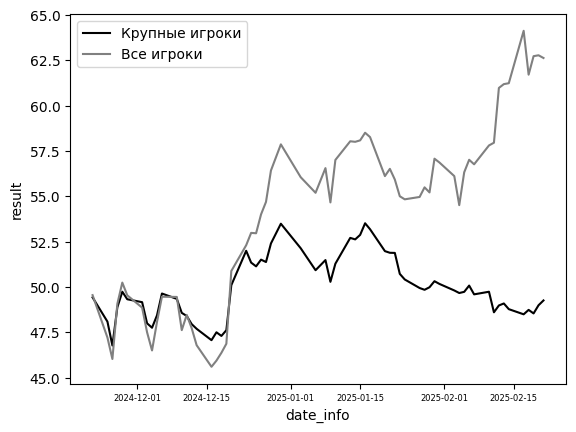

In [407]:
sns.lineplot(data = df_res, x = 'date_info', y = 'result', label='Крупные игроки', color = 'black')
sns.lineplot(data = df_res, x = 'date_info', y = 'close', label='Все игроки', color = 'gray')

In [ ]:
# Означает, что во время падающего рынка, спекулянты погонят цену быстрее к справедливой